In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()


import warnings
warnings.filterwarnings('ignore')

### Importing the Data 

In [2]:
income_train = pd.read_csv(r"C:\Users\ADMIN\Desktop\Data Scientist\Machine Learning\Projects\Project 2- Income qualification\Dataset for the project\train.csv")
income_test =  pd.read_csv(r"C:\Users\ADMIN\Desktop\Data Scientist\Machine Learning\Projects\Project 2- Income qualification\Dataset for the project\test.csv")

In [3]:
income_train.head()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,ID_279628684,190000.0,0,3,0,1,1,0,NaN,0,...,100,1849,1,100,0,1.000000,0.0,100.0,1849,4
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,...,144,4489,1,144,0,1.000000,64.0,144.0,4489,4
2,ID_68de51c94,NaN,0,8,0,1,1,0,NaN,0,...,121,8464,1,0,0,0.250000,64.0,121.0,8464,4
3,ID_d671db89c,180000.0,0,5,0,1,1,1,1.0,0,...,81,289,16,121,4,1.777778,1.0,121.0,289,4
4,ID_d56d6f5f5,180000.0,0,5,0,1,1,1,1.0,0,...,121,1369,16,121,4,1.777778,1.0,121.0,1369,4


In [4]:
income_test.head()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq
0,ID_2f6873615,NaN,0,5,0,1,1,0,NaN,1,...,4,0,16,9,0,1,2.25,0.25,272.25,16
1,ID_1c78846d2,NaN,0,5,0,1,1,0,NaN,1,...,41,256,1681,9,0,1,2.25,0.25,272.25,1681
2,ID_e5442cf6a,NaN,0,5,0,1,1,0,NaN,1,...,41,289,1681,9,0,1,2.25,0.25,272.25,1681
3,ID_a8db26a79,NaN,0,14,0,1,1,1,1.0,0,...,59,256,3481,1,256,0,1.00,0.00,256.00,3481
4,ID_a62966799,175000.0,0,4,0,1,1,1,1.0,0,...,18,121,324,1,0,1,0.25,64.00,NaN,324


In [5]:
type(income_train)

pandas.core.frame.DataFrame

In [6]:
type(income_test)

pandas.core.frame.DataFrame

In [7]:
income_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9557 entries, 0 to 9556
Columns: 143 entries, Id to Target
dtypes: float64(8), int64(130), object(5)
memory usage: 10.4+ MB


In [8]:
income_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23856 entries, 0 to 23855
Columns: 142 entries, Id to agesq
dtypes: float64(8), int64(129), object(5)
memory usage: 25.8+ MB


### Here we dont have Target feature in the test data set

In [9]:
income_train.columns

Index(['Id', 'v2a1', 'hacdor', 'rooms', 'hacapo', 'v14a', 'refrig', 'v18q',
       'v18q1', 'r4h1',
       ...
       'SQBescolari', 'SQBage', 'SQBhogar_total', 'SQBedjefe', 'SQBhogar_nin',
       'SQBovercrowding', 'SQBdependency', 'SQBmeaned', 'agesq', 'Target'],
      dtype='object', length=143)

In [10]:
# List the columns for different datatypes:
print('Integer Type: ')
print(income_train.select_dtypes(np.int64).columns)
print('\n')
print('Float Type: ')
print(income_train.select_dtypes(np.float64).columns)
print('\n')
print('Object Type: ')
print(income_train.select_dtypes(np.object).columns)

Integer Type: 
Index(['hacdor', 'rooms', 'hacapo', 'v14a', 'refrig', 'v18q', 'r4h1', 'r4h2',
       'r4h3', 'r4m1',
       ...
       'area1', 'area2', 'age', 'SQBescolari', 'SQBage', 'SQBhogar_total',
       'SQBedjefe', 'SQBhogar_nin', 'agesq', 'Target'],
      dtype='object', length=130)


Float Type: 
Index(['v2a1', 'v18q1', 'rez_esc', 'meaneduc', 'overcrowding',
       'SQBovercrowding', 'SQBdependency', 'SQBmeaned'],
      dtype='object')


Object Type: 
Index(['Id', 'idhogar', 'dependency', 'edjefe', 'edjefa'], dtype='object')


In [11]:
income_train.isnull().any()

Id                 False
v2a1                True
hacdor             False
rooms              False
hacapo             False
                   ...  
SQBovercrowding    False
SQBdependency      False
SQBmeaned           True
agesq              False
Target             False
Length: 143, dtype: bool

In [12]:
income_train.isnull().sum()

Id                    0
v2a1               6860
hacdor                0
rooms                 0
hacapo                0
                   ... 
SQBovercrowding       0
SQBdependency         0
SQBmeaned             5
agesq                 0
Target                0
Length: 143, dtype: int64

In [13]:
income_train.select_dtypes('int64')

,hacdor,rooms,hacapo,v14a,refrig,v18q,r4h1,r4h2,r4h3,r4m1,...,area1,area2,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,agesq,Target
0,0,3,0,1,1,0,0,1,1,0,...,1,0,43,100,1849,1,100,0,1849,4
1,0,4,0,1,1,1,0,1,1,0,...,1,0,67,144,4489,1,144,0,4489,4
2,0,8,0,1,1,0,0,0,0,0,...,1,0,92,121,8464,1,0,0,8464,4
3,0,5,0,1,1,1,0,2,2,1,...,1,0,17,81,289,16,121,4,289,4
4,0,5,0,1,1,1,0,2,2,1,...,1,0,37,121,1369,16,121,4,1369,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9552,0,6,0,1,1,0,0,2,2,1,...,0,1,46,81,2116,25,81,1,2116,2
9553,0,6,0,1,1,0,0,2,2,1,...,0,1,2,0,4,25,81,1,4,2
9554,0,6,0,1,1,0,0,2,2,1,...,0,1,50,25,2500,25,81,1,2500,2
9555,0,6,0,1,1,0,0,2,2,1,...,0,1,26,121,676,25,81,1,676,2


In [14]:
#Find columns with null values in integer data types
null_counts=income_train.select_dtypes('int64').isnull().sum()
null_counts[null_counts > 0]

Series([], dtype: int64)

In [15]:
income_train.select_dtypes('float64').head()

,v2a1,v18q1,rez_esc,meaneduc,overcrowding,SQBovercrowding,SQBdependency,SQBmeaned
0,190000.0,NaN,NaN,10.0,1.000000,1.000000,0.0,100.0
1,135000.0,1.0,NaN,12.0,1.000000,1.000000,64.0,144.0
2,NaN,NaN,NaN,11.0,0.500000,0.250000,64.0,121.0
3,180000.0,1.0,1.0,11.0,1.333333,1.777778,1.0,121.0
4,180000.0,1.0,NaN,11.0,1.333333,1.777778,1.0,121.0


In [16]:
#Find columns with null values
null_counts=income_train.select_dtypes('float64').isnull().sum()
null_counts[null_counts > 0]

v2a1         6860
v18q1        7342
rez_esc      7928
meaneduc        5
SQBmeaned       5
dtype: int64

In [17]:
income_train.select_dtypes('object').head()

,Id,idhogar,dependency,edjefe,edjefa
0,ID_279628684,21eb7fcc1,no,10,no
1,ID_f29eb3ddd,0e5d7a658,8,12,no
2,ID_68de51c94,2c7317ea8,8,no,11
3,ID_d671db89c,2b58d945f,yes,11,no
4,ID_d56d6f5f5,2b58d945f,yes,11,no


In [18]:
#Find columns with null values
null_counts=income_train.select_dtypes('object').isnull().sum()
null_counts[null_counts > 0]

Series([], dtype: int64)

### Here we have no null values in integer and object data types but we have in float data types and we also have mixed values in object data types viz dependency, edjefe and edjefa feature columns 

### Data Cleaning

### First handling with mixed values. First fix the column with mixed value:

dependency, Dependency rate, calculated = (number of members of the household younger than 19 or older than 64)/(number of member of household between 19 and 64)

edjefe= years of education of male head of household, based on the interaction of escolari (years of education), head of household and gender, yes=1 and no=0

edjefa: years of education of female head of household, based on the interaction of escolari (years of education), head of household and gender, yes=1 and no=0

For these three variables, it seems “yes” = 1 and “no” = 0. We can correct the variables using a mapping and convert to floats.

In [1]:
mapping={'yes':1,'no':0}

for df in [income_train, income_test]:
    df['dependency'] =df['dependency'].replace(map).astype(np.float64)
    df['edjefe'] =df['edjefe'].replace(map).astype(np.float64)
    df['edjefa'] =df['edjefa'].replace(mapping).astype(np.float64)

NameError: name 'income_train' is not defined

In [20]:
income_train.select_dtypes('object').head()
#income_train.head(2)

,Id,idhogar
0,ID_279628684,21eb7fcc1
1,ID_f29eb3ddd,0e5d7a658
2,ID_68de51c94,2c7317ea8
3,ID_d671db89c,2b58d945f
4,ID_d56d6f5f5,2b58d945f


In [21]:
income_train[['dependency','edjefe','edjefa']].describe().T

,count,mean,std,min,25%,50%,75%,max
dependency,9557.0,1.149550,1.605993,0.0,0.333333,0.666667,1.333333,8.0
edjefe,9557.0,5.096788,5.246513,0.0,0.000000,6.000000,9.000000,21.0
edjefa,9557.0,2.896830,4.612056,0.0,0.000000,0.000000,6.000000,21.0


## Fix the columns with null values
As per the data from null values for columns, we have following features with null values:

v2a1 (total nulls: 6860) : Monthly rent payment

v18q1 (total nulls: 7342) : number of tablets household owns

rez_esc (total nulls: 7928) : Years behind in school

meaneduc (total nulls: 5) : average years of education for adults (18+)

SQBmeaned (total nulls: 5) : square of the mean years of education of adults (>=18) in the household


### A: Check v2a1 (monthly rent payment) and its relative columns. 
Columns related to monthly rent payments

1- tipovivi1, =1 own and fully paid house

2- tipovivi2, "=1 own, paying in installments"

3- tipovivi3, =1 rented

4- tipovivi4, =1 precarious

5- tipovivi5, "=1 other(assigned, borrowed)"

In [22]:
# Check v2a1 (monthly rent payment) and its relative columns.


#income_train[['v2a1']].isnull().sum()
data=income_train[income_train['v2a1'].isnull()].head()

In [23]:
income_train_rent_columns=['tipovivi1','tipovivi2','tipovivi3','tipovivi4','tipovivi5']
data[income_train_rent_columns]

,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5
2,1,0,0,0,0
13,1,0,0,0,0
14,1,0,0,0,0
26,1,0,0,0,0
32,1,0,0,0,0


### Clearly tipo variable have home either rented or owned 

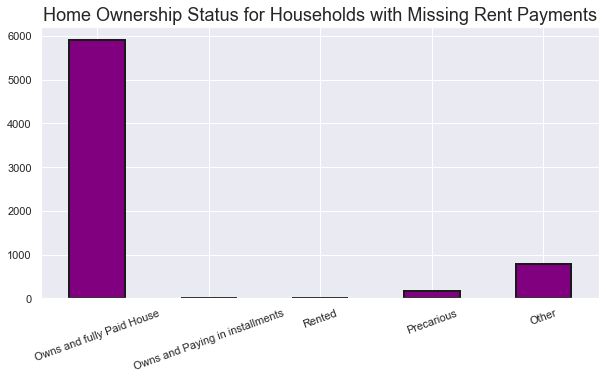

In [24]:
# Here Tipo Variables indicate home ownership
own_home = [x for x in income_train if x.startswith('tipo')]


# Plot the home ownership variables for home missing rent payments
income_train.loc[income_train['v2a1'].isnull(), own_home].sum().plot.bar(figsize = (10, 5),
                                                                        color = 'purple',
                                                              edgecolor = 'k', linewidth = 2);
plt.xticks([0, 1, 2, 3, 4],
           ['Owns and fully Paid House', 'Owns and Paying in installments', 'Rented', 'Precarious', 'Other'],
          rotation = 20)
plt.title('Home Ownership Status for Households with Missing Rent Payments', size = 18);

### Clearly there is no monthly rent payment for the house whose payment is fully paid.

### Treating missing values in v2a1 column 

In [25]:
income_train[['v2a1']].describe().T

,count,mean,std,min,25%,50%,75%,max
v2a1,2697.0,165231.606971,150457.133301,0.0,80000.0,130000.0,200000.0,2353477.0


In [26]:
# Add 0 for all null values in v2a1 because minimum value for v2a1 is 0 and maximum value is 2353477
for df in [income_train, income_test]:
    df['v2a1'].fillna(value=0, inplace=True)

income_train[['v2a1']].isnull().sum()

v2a1    0
dtype: int64

### B: Check v18q1 (total nulls: 7342) : number of tablets household owns

Columns related to number of tablets household owns

v18q: Owns a tablet

But here owning a tablet is related to the household, so checking the rows at household level

In [27]:
# Filtering the data to household head [parentesco1=1 : Household head]
income_train_heads = income_train.loc[income_train['parentesco1'] == 1].copy()
# Grouping them into tablet owns and checking for tablet household owns
income_train_heads.groupby('v18q')['v18q1'].apply(lambda x: x.isnull().sum()).reset_index()

,v18q,v18q1
0,0,2318
1,1,0


In [28]:
income_train['v18q1'].value_counts()

1.0    1586
2.0     444
3.0     129
4.0      37
5.0      13
6.0       6
Name: v18q1, dtype: int64

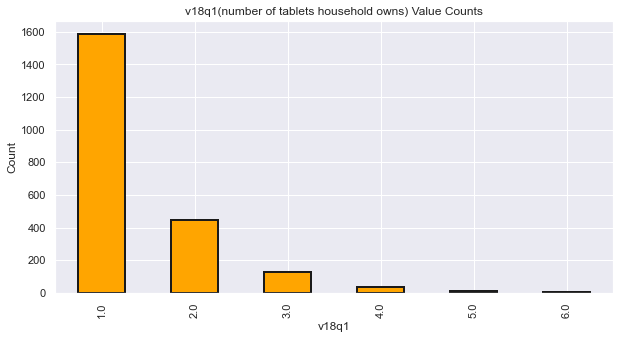

In [29]:
income_train['v18q1'].value_counts().sort_index().plot.bar(color = 'orange', figsize=(10,5),
                                             edgecolor = 'k',
                                             linewidth = 2)
plt.xlabel('v18q1'); plt.title('v18q1(number of tablets household owns) Value Counts'); plt.ylabel('Count')
plt.show();


### Clearly when owns a tablet column is 1, there is zero number of tablets household owns  

In [30]:
income_train[['v18q1']].describe().T

,count,mean,std,min,25%,50%,75%,max
v18q1,2215.0,1.404063,0.763131,1.0,1.0,1.0,2.0,6.0


###  Treating missing values in v18q1 column

In [31]:
# Add 1 for all null values in v2a1 because minimum value for v2a1 is 1 and maximum value is 6
for df in [income_train, income_test]:
    df['v18q1'].fillna(value=1, inplace=True)

income_train[['v18q1']].isnull().sum()

v18q1    0
dtype: int64

### C: Check rez_esc (total nulls: 7928) : Years behind in school

Columns related to Years behind in school

age: Age in Years

In [32]:
# Check null values in rez_esc(Years behind in school) and describe age
income_train.loc[income_train['rez_esc'].isnull()]['age'].describe()

count    7928.000000
mean       38.833249
std        20.989486
min         0.000000
25%        24.000000
50%        38.000000
75%        54.000000
max        97.000000
Name: age, dtype: float64

In [33]:
# Check non- null values in rez_esc(Years behind in school) and describe age
income_train.loc[income_train['rez_esc'].notnull()]['age'].describe()

count    1629.000000
mean       12.258441
std         3.218325
min         7.000000
25%         9.000000
50%        12.000000
75%        15.000000
max        17.000000
Name: age, dtype: float64

#### Clearly here when the age is in between 7 and 17, then we have some value in rez_esc(years behind in school)

In [34]:
income_train.loc[(income_train['rez_esc'].isnull() & 
                     ((income_train['age'] > 7) & (income_train['age'] < 17)))]['age'].describe()
#income_train.loc[(income_train['rez_esc'].notnull() & 
                     #((income_train['age'] > 0) & (income_train['age'] < 97)))]['age'].describe()

count     1.0
mean     10.0
std       NaN
min      10.0
25%      10.0
50%      10.0
75%      10.0
max      10.0
Name: age, dtype: float64

#### Clearly there is only one person whose age is 10 and who is 'behind in school' 

In [35]:
income_train[(income_train['age'] ==10) & income_train['rez_esc'].isnull()].head()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
2514,ID_f012e4242,160000.0,0,6,0,1,1,1,1.0,0,...,0,100,9,121,1,2.25,0.25,182.25,100,4


#### Clearly that one person ID is ID_f012e4242 

### Treating missing values in rez_esc column 

In [36]:
# Check null values in rez_esc(Years behind in school) and age
income_train.loc[income_train['rez_esc'].isnull()]['age'].describe()

count    7928.000000
mean       38.833249
std        20.989486
min         0.000000
25%        24.000000
50%        38.000000
75%        54.000000
max        97.000000
Name: age, dtype: float64

In [37]:
# Add 0 for all null values in rez_esc because minimum value for age is 0 and maximum value is 97 
for df in [income_train, income_test]:
    df['rez_esc'].fillna(value=0, inplace=True)

income_train[['rez_esc']].isnull().sum()

rez_esc    0
dtype: int64

### D: Check meaneduc (total nulls: 5) : average years of education for adults (18+)

Columns related to average years of education for adults (18+)

edjefe: years of education of male head of household, based on the interaction of escolari (years of education),
head of household and gender, yes=1 and no=0

edjefa: years of education of female head of household, based on the interaction of escolari (years of education),head of household and gender, yes=1 and no=0

instlevel1: =1 no level of education

instlevel2: =1 incomplete primary

In [38]:
# Check null values in meaneduc(average years of education for adults (18+))
income_train[income_train['meaneduc'].isnull()].head()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
1291,ID_bd8e11b0f,0.0,0,7,0,1,1,0,1.0,0,...,100,324,1,0,1,0.04,64.0,NaN,324,4
1840,ID_46ff87316,110000.0,0,1,0,1,1,0,1.0,0,...,36,324,4,16,4,4.00,64.0,NaN,324,4
1841,ID_69f50bf3e,110000.0,0,1,0,1,1,0,1.0,0,...,16,324,4,16,4,4.00,64.0,NaN,324,4
2049,ID_db3168f9f,180000.0,0,3,0,1,1,0,1.0,0,...,144,361,4,144,4,1.00,64.0,NaN,361,4
2050,ID_2a7615902,180000.0,0,3,0,1,1,0,1.0,0,...,144,361,4,144,4,1.00,64.0,NaN,361,4


In [39]:
income_train[['edjefe','edjefa','instlevel1','instlevel2']].describe()

,edjefe,edjefa,instlevel1,instlevel2
count,9557.000000,9557.000000,9557.000000,9557.000000
mean,5.096788,2.896830,0.134666,0.170556
std,5.246513,4.612056,0.341384,0.376140
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,6.000000,0.000000,0.000000,0.000000
75%,9.000000,6.000000,0.000000,0.000000
max,21.000000,21.000000,1.000000,1.000000


In [40]:
income_train_edu_columns=['edjefe','edjefa','instlevel1','instlevel2']
data[income_train_edu_columns][data[income_train_edu_columns]['instlevel1']>0].describe()

,edjefe,edjefa,instlevel1,instlevel2
count,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN


#### Clearly here  meaneduc(average years of education for adults (18+)) is null when instlevel1=1( no level of education) is zero

### Treating missing values in meaneduc(average years of education for adults (18+)) column 

In [41]:
#Add 0 for all null values in meaneduc because minimum value is 0 and maximum value is 21 
for df in [income_train, income_test]:
    df['meaneduc'].fillna(value=0, inplace=True)
income_train[['meaneduc']].isnull().sum()

meaneduc    0
dtype: int64

###  E: Check SQBmeaned (total nulls: 5) : square of the mean years of education of adults (>=18) in the household

Columns related to square of the mean years of education of adults (>=18) in the household

edjefe: years of education of male head of household, based on the interaction of escolari (years of education), head of household and gender, yes=1 and no=0

edjefa: years of education of female head of household, based on the interaction of escolari (years of education),head of household and gender, yes=1 and no=0

instlevel1: =1 no level of education

instlevel2: =1 incomplete primary

In [42]:
# Check null values in SQBmeaned(square of the mean years of education of adults (>=18) in the household)
income_train[income_train['SQBmeaned'].isnull()].head()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
1291,ID_bd8e11b0f,0.0,0,7,0,1,1,0,1.0,0,...,100,324,1,0,1,0.04,64.0,NaN,324,4
1840,ID_46ff87316,110000.0,0,1,0,1,1,0,1.0,0,...,36,324,4,16,4,4.00,64.0,NaN,324,4
1841,ID_69f50bf3e,110000.0,0,1,0,1,1,0,1.0,0,...,16,324,4,16,4,4.00,64.0,NaN,324,4
2049,ID_db3168f9f,180000.0,0,3,0,1,1,0,1.0,0,...,144,361,4,144,4,1.00,64.0,NaN,361,4
2050,ID_2a7615902,180000.0,0,3,0,1,1,0,1.0,0,...,144,361,4,144,4,1.00,64.0,NaN,361,4


In [43]:
income_train[['edjefe','edjefa','instlevel1','instlevel2']].describe()

,edjefe,edjefa,instlevel1,instlevel2
count,9557.000000,9557.000000,9557.000000,9557.000000
mean,5.096788,2.896830,0.134666,0.170556
std,5.246513,4.612056,0.341384,0.376140
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,6.000000,0.000000,0.000000,0.000000
75%,9.000000,6.000000,0.000000,0.000000
max,21.000000,21.000000,1.000000,1.000000


In [44]:
income_train_sqmed_columns=['edjefe','edjefa','instlevel1','instlevel2']
data[income_train_sqmed_columns][data[income_train_sqmed_columns]['instlevel1']>0].describe()

,edjefe,edjefa,instlevel1,instlevel2
count,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN


#### Clearly here SQBmeaned  : square of the mean years of education of adults (>=18) in the household is null when instlevel1=1( no level of education) is zero 

### Treating missing values in meaneduc(average years of education for adults (18+)) column 

In [45]:
for df in [income_train, income_test]:
    df['SQBmeaned'].fillna(value=0, inplace=True)
income_train[['SQBmeaned']].isnull().sum()

SQBmeaned    0
dtype: int64

### Again check the complete data for any null value 

In [46]:
income_train.isnull().sum()

Id                 0
v2a1               0
hacdor             0
rooms              0
hacapo             0
                  ..
SQBovercrowding    0
SQBdependency      0
SQBmeaned          0
agesq              0
Target             0
Length: 143, dtype: int64

#### Clearly there is no null values now in the data 

In [47]:
# Groupby the household and figure out the number of unique values (where targets are equal)
income_train_tarequal=income_train.groupby('idhogar')['Target'].apply(lambda x: x.nunique() == 1)
income_train_tarequal

idhogar
001ff74ca    True
003123ec2    True
004616164    True
004983866    True
005905417    True
             ... 
ff9343a35    True
ff9d5ab17    True
ffae4a097    True
ffe90d46f    True
fff7d6be1    True
Name: Target, Length: 2988, dtype: bool

In [48]:
# Groupby the household and figure out the number of non-unique values (where targets are not equal)
income_train_tarnotequal=income_train_tarequal[income_train_tarequal != True]
#income_train_tarnotequal
print('There are {} households where the family members do not all have the same target.'.format(len(income_train_tarnotequal)))

There are 85 households where the family members do not all have the same target.


In [49]:
#Lets check for only one household
income_train[income_train['idhogar'] == income_train_tarnotequal.index[0]][['idhogar', 'parentesco1', 'Target']]

,idhogar,parentesco1,Target
7651,0172ab1d9,0,3
7652,0172ab1d9,0,2
7653,0172ab1d9,0,3
7654,0172ab1d9,1,3
7655,0172ab1d9,0,2


### Check for the families with head or not head 

In [51]:
#Lets use Target value of the parent record (head of the household) and update rest. But before that lets check
# if all families has a head. 

#households_head = df_income_train.groupby('idhogar')['parentesco1'].sum()

# Find households without a head
#households_no_head = df_income_train.loc[df_income_train['idhogar'].isin(households_head[households_head == 0].index), :]

#print('There are {} households without a head.'.format(households_no_head['idhogar'].nunique()))

In [52]:
#Check for the families those have head
head_households=income_train.groupby('idhogar')['parentesco1'].sum()
head_households

idhogar
001ff74ca    1
003123ec2    1
004616164    1
004983866    1
005905417    1
            ..
ff9343a35    1
ff9d5ab17    1
ffae4a097    1
ffe90d46f    1
fff7d6be1    1
Name: parentesco1, Length: 2988, dtype: int64

In [55]:
print('There are {} households with head.'.format(len(head_households)))

There are 2988 households with head.


In [65]:
#Check for the families those who don't have head
no_head_households = income_train.loc[income_train['idhogar'].isin(head_households[head_households == 0].index), :]

In [64]:
print('There are {} households without a head.'.format(no_head_households['idhogar'].nunique()))

There are 15 households without a head.


#### Check for households with and without a head and target values are different 

In [72]:
head_households_equal = income_train.groupby('idhogar')['Target'].apply(lambda x: x.nunique() == 1)
print('{} Households with head have different Target value.'.format(sum(head_households_equal == False)))

85 Households with head have different Target value.


In [70]:
no_head_households_equal = no_head_households.groupby('idhogar')['Target'].apply(lambda x: x.nunique() == 1)
print('{} Households with no head have different Target value.'.format(sum(no_head_households_equal == False)))

0 Households with no head have different Target value.
